In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramashishyadav","key":"5e5c3e96a45d9deab0ed4059e8bc4c4c"}'}

In [3]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:18<00:00, 202MB/s]
100% 2.70G/2.70G [00:18<00:00, 157MB/s]


In [5]:
import zipfile
zip_ref= zipfile.ZipFile('/content/new-plant-diseases-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [7]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [8]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [9]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [10]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[199.   198.   194.  ]
   [202.   201.   197.  ]
   [197.5  196.5  192.5 ]
   ...
   [136.5  129.5  121.5 ]
   [135.   128.   120.  ]
   [147.   140.   132.  ]]

  [[196.75 195.75 191.75]
   [199.75 198.75 194.75]
   [199.75 198.75 194.75]
   ...
   [140.25 133.25 125.25]
   [143.5  136.5  128.5 ]
   [143.5  136.5  128.5 ]]

  [[198.5  197.5  193.5 ]
   [200.25 199.25 195.25]
   [204.   203.   199.  ]
   ...
   [151.75 144.75 136.75]
   [148.75 141.75 133.75]
   [146.   139.   131.  ]]

  ...

  [[204.25 201.25 194.25]
   [205.5  202.5  195.5 ]
   [203.5  200.5  193.5 ]
   ...
   [144.5  131.5  123.5 ]
   [146.25 133.25 125.25]
   [152.25 139.25 131.25]]

  [[210.25 207.25 200.25]
   [205.25 202.25 195.25]
   [199.75 196.75 189.75]
   ...
   [155.75 142.75 134.75]
   [150.5  137.5  129.5 ]
   [142.   129.   121.  ]]

  [[207.75 204.75 197.75]
   [202.75 199.75 192.75]
   [200.25 197.25 190.25]
   ...
   [145.75 132.75 124.75]
   [154.   141.   133.  ]
   [146.   133.   12

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [13]:
model=Sequential()

In [14]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(1058,activation='relu'))
model.add(Dense(38,activation='sigmoid'))

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [22]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
2197/2197 [==============================] - 124s 52ms/step - loss: 1.7168 - accuracy: 0.5098 - val_loss: 0.7153 - val_accuracy: 0.7744
Epoch 2/5
2197/2197 [==============================] - 120s 54ms/step - loss: 0.4981 - accuracy: 0.8384 - val_loss: 0.4774 - val_accuracy: 0.8456
Epoch 3/5
2197/2197 [==============================] - 112s 51ms/step - loss: 0.3229 - accuracy: 0.8952 - val_loss: 0.3590 - val_accuracy: 0.8853
Epoch 4/5
2197/2197 [==============================] - 112s 51ms/step - loss: 0.2398 - accuracy: 0.9209 - val_loss: 0.3771 - val_accuracy: 0.8875
Epoch 5/5
2197/2197 [==============================] - 111s 50ms/step - loss: 0.1992 - accuracy: 0.9337 - val_loss: 0.4187 - val_accuracy: 0.8792


In [23]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 52s 24ms/step - loss: 0.2003 - accuracy: 0.9331


In [24]:
valid_loss,valid_acc=model.evaluate(validation_set)

550/550 [==============================] - 12s 22ms/step - loss: 0.4187 - accuracy: 0.8792


In [25]:
# model.save('trained_model.h5')
model.save('trained_model.keras')

In [26]:
training_history.history

{'loss': [1.7167925834655762,
  0.4980818033218384,
  0.32291874289512634,
  0.23980337381362915,
  0.19920121133327484],
 'accuracy': [0.5097659826278687,
  0.8384380340576172,
  0.8952272534370422,
  0.9209190011024475,
  0.933722198009491],
 'val_loss': [0.7152913212776184,
  0.47736722230911255,
  0.35901761054992676,
  0.377124160528183,
  0.418668657541275],
 'val_accuracy': [0.7744138240814209,
  0.8456066250801086,
  0.8853289484977722,
  0.8874914646148682,
  0.8791828155517578]}

In [27]:
import json
with open("training_his.json","w") as f:
  json.dump(training_history.history,f)

In [28]:
epochs=[i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0.5, 0, 'training_history')

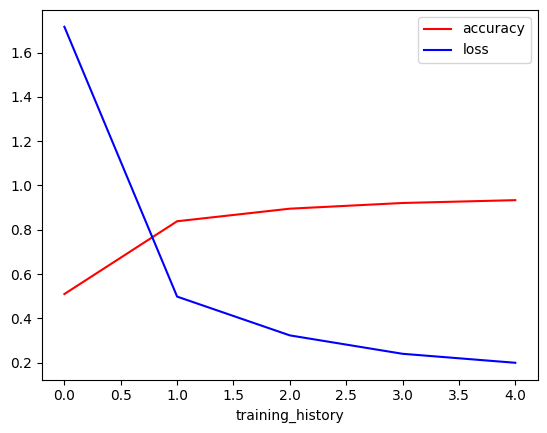

In [29]:
plt.plot(training_history.history['accuracy'],label='accuracy',color='red')
plt.plot(training_history.history['loss'],label='loss',color='blue')
plt.legend()
plt.xlabel('training_history')

In [30]:
class_names=validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),

    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred=model.predict(test_set)

550/550 [==============================] - 13s 23ms/step


In [34]:
y_pred,y_pred.shape

(array([[2.9454650e-08, 1.1825384e-02, 9.5995069e-02, ..., 5.5551955e-14,
         1.6005320e-07, 6.7543661e-14],
        [1.5080103e-04, 8.2232442e-04, 5.2902429e-09, ..., 2.7435091e-05,
         1.7933044e-09, 1.4809090e-08],
        [4.4426553e-02, 1.5223712e-06, 4.5851516e-07, ..., 9.3041956e-03,
         2.4717134e-10, 2.0480501e-08],
        ...,
        [9.5252723e-02, 1.6438074e-05, 2.0442770e-03, ..., 5.5667260e-07,
         3.0164995e-06, 1.0182458e-02],
        [2.1566461e-01, 2.9726667e-04, 1.1503876e-03, ..., 1.3266696e-04,
         1.7022909e-07, 8.9552655e-04],
        [4.2856354e-02, 3.6786267e-05, 1.9665884e-03, ..., 4.5938063e-01,
         1.5652181e-03, 3.7235690e-03]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([12, 19, 25, ...,  3, 21, 31])>

In [36]:
true_categories=tf.concat([y for x, y in test_set],axis=0)

In [37]:
y_true=tf.argmax(true_categories,axis=1)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_true,predicted_categories,target_names=class_names)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.03      0.03      0.03       504\n                                 Apple___Black_rot       0.05      0.05      0.05       497\n                          Apple___Cedar_apple_rust       0.02      0.02      0.02       440\n                                   Apple___healthy       0.03      0.02      0.02       502\n                               Blueberry___healthy       0.03      0.03      0.03       454\n          Cherry_(including_sour)___Powdery_mildew       0.04      0.04      0.04       421\n                 Cherry_(including_sour)___healthy       0.05      0.05      0.05       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.01      0.02      0.01       410\n                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477\n               Corn_(maize)___Northern_Leaf_Blight       0.02      

In [46]:
cm=confusion_matrix(y_true,predicted_categories)

In [47]:
cm.shape

(38, 38)

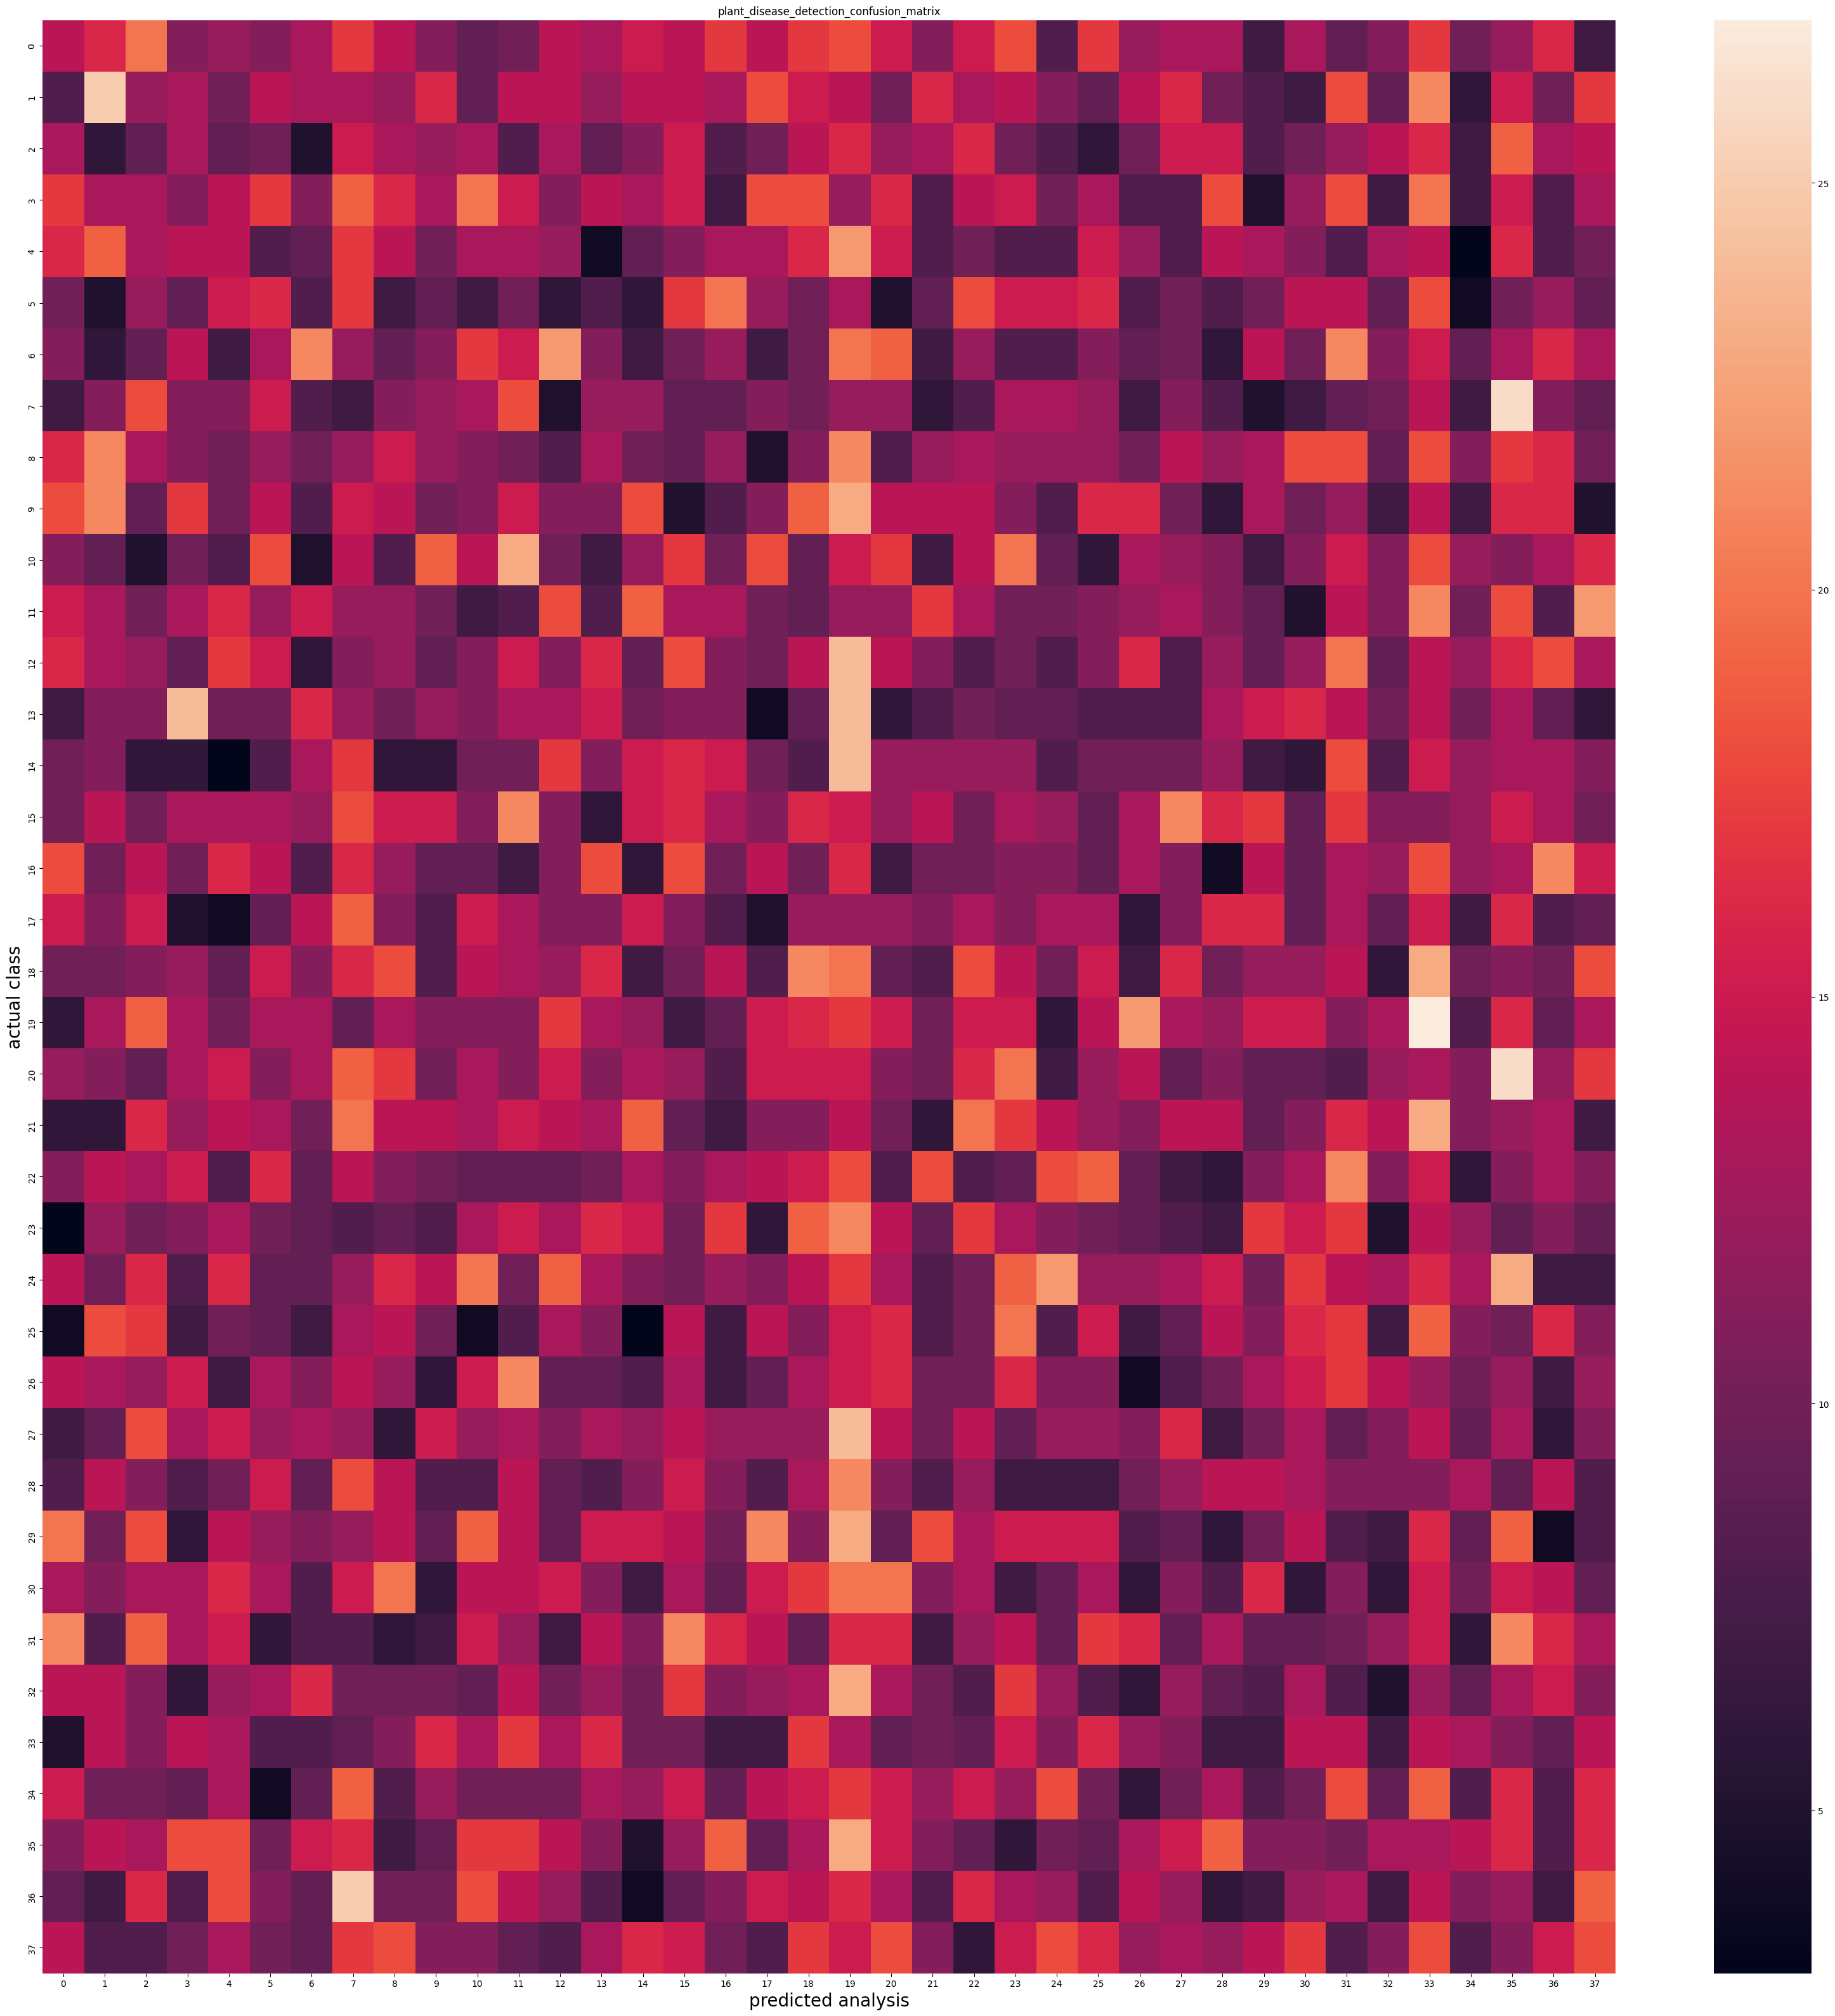

In [48]:
plt.figure(figsize=(40,40))
sns.heatmap(cm)
plt.title('plant_disease_detection_confusion_matrix')
plt.xlabel("predicted analysis",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.show()

**Loading Model**

In [49]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [50]:
model=tf.keras.models.load_model('trained_model.keras')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

**Visualization of single image of test_set**

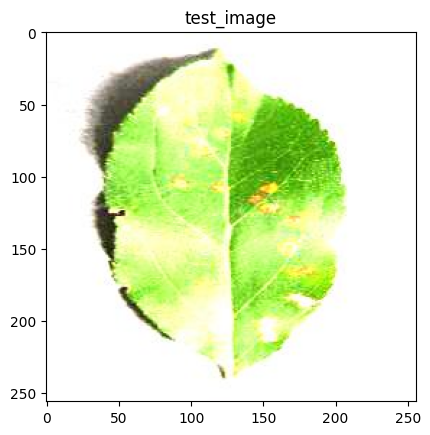

In [52]:
import cv2
image_path='/content/test/test/AppleCedarRust1.JPG'
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('test_image')
# plt.xticks([])
# plt.yticks([])
plt.show()

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
image =tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr)

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]


In [57]:
print(input_arr.shape)


(1, 128, 128, 3)


In [58]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 1s 609ms/step


(array([[5.2884500e-04, 1.5742059e-03, 9.9979097e-01, 4.9529808e-07,
         2.5526017e-03, 1.2857778e-04, 2.8045773e-07, 2.6702569e-04,
         3.5843179e-05, 2.8829692e-05, 6.2861150e-10, 9.1280586e-01,
         1.7506805e-01, 9.3126005e-01, 6.2905916e-04, 1.8423008e-05,
         1.5849014e-01, 1.5431881e-07, 4.5473930e-01, 5.2723056e-03,
         3.5315150e-01, 9.1306239e-01, 7.6240855e-03, 1.1823744e-03,
         1.0351161e-07, 1.9854099e-07, 8.9127773e-01, 8.3828368e-04,
         5.4950321e-01, 4.6451151e-01, 2.2456019e-04, 2.8901946e-04,
         9.5858872e-01, 6.4555387e-04, 5.1137131e-01, 3.4154478e-02,
         5.3389354e-05, 6.2797731e-06]], dtype=float32),
 (1, 38))

In [60]:
result_index=np.argmax(prediction)
result_index

2

**Displaying result of disease prediction**

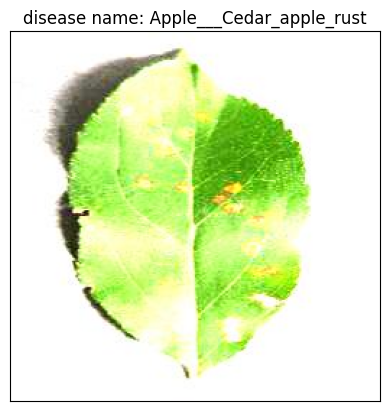

In [62]:
model_prediction=class_names[result_index]
plt.imshow(img)
plt.title(f"disease name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [64]:
model_prediction

'Apple___Cedar_apple_rust'